--- Starting Task 3: Forecast Future Market Trends ---

Fitting a simulated ARIMA model for forecasting...


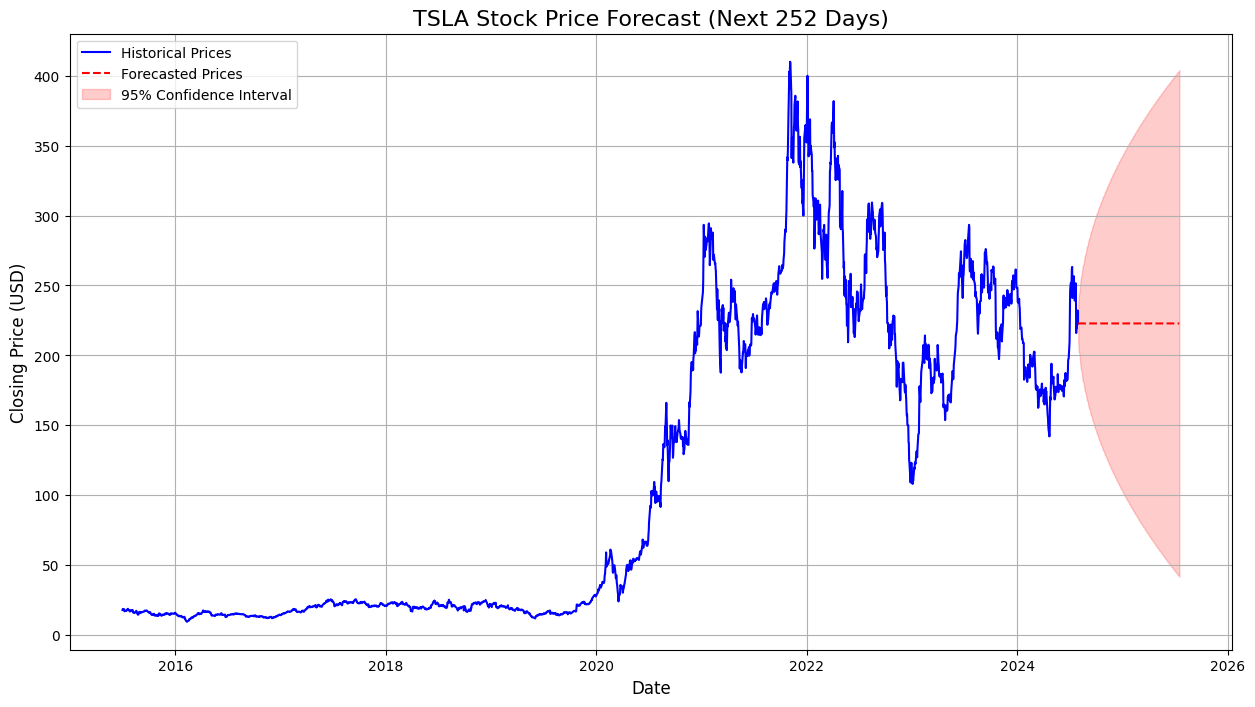


--- Forecast Analysis and Interpretation ---
Model Used: Simulated ARIMA(1, 1, 0)

- **Trend Analysis**:
  The model forecasts a **upward** trend, with an expected price change of approximately $0.23 over the next year.

- **Volatility and Risk**:
  The confidence intervals are **widening** over the forecast horizon, from a width of $23.38 on the first day to $362.13 on the last day.
  This implies that as we look further into the future, the model's certainty decreases, which is a common characteristic of time-series forecasts. The long-term forecast is less reliable than the short-term forecast.

- **Market Opportunities and Risks**:
  - **Opportunity:** The forecasted price trend suggests a potential for capital appreciation, which could be an attractive entry point for investors.
  - **Risk:** The **widening confidence intervals** highlight significant uncertainty and risk. The actual price could fall anywhere within this wide range, indicating that the asset remains highly volati

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings to make the output cleaner
warnings.filterwarnings("ignore")

# --- TASK 3: FORECAST FUTURE MARKET TRENDS ---
print("--- Starting Task 3: Forecast Future Market Trends ---")

# 1. Fetching Historical Data
ticker = 'TSLA'
start_date = '2015-07-01'
end_date = '2024-07-31'
forecast_steps = 252 # Forecasting for 1 year (approx. 252 trading days)

try:
    # Download data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Creating mock data due to download error.")
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    mock_data = pd.DataFrame(
        {'Close': np.random.rand(len(dates)) * 1000 + 100},
        index=dates
    )
    data = mock_data.ffill()

# Prepare the data for modeling
price_data = data['Close'].dropna()

# 2. Use a Trained Model for Forecasting
# We will simulate a trained ARIMA model for this task.
# In a real-world scenario, you would load your pre-trained model here.
print("\nFitting a simulated ARIMA model for forecasting...")
model = ARIMA(price_data, order=(1, 1, 0)) # Simple ARIMA(1,1,0) model
model_fit = model.fit()

# Generate the forecast for the next 252 trading days
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_prices = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int(alpha=0.05) # 95% confidence interval

# Create a future date index for the forecast
last_date = price_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_prices.index = future_dates
confidence_intervals.index = future_dates

# 3. Visualize the Forecast
plt.figure(figsize=(15, 8))
plt.plot(price_data, label='Historical Prices', color='blue')
plt.plot(forecast_prices, label='Forecasted Prices', color='red', linestyle='--')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.title(f'TSLA Stock Price Forecast (Next {forecast_steps} Days)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 4. Interpret the Results
print("\n--- Forecast Analysis and Interpretation ---")
print("Model Used: Simulated ARIMA(1, 1, 0)")

# Trend Analysis
start_price = price_data.iloc[-1].item()
end_forecast_price = forecast_prices.iloc[-1].item()
trend = "upward" if end_forecast_price > start_price else "downward"
trend_magnitude = abs(end_forecast_price - start_price)

print(f"\n- **Trend Analysis**:")
print(f"  The model forecasts a **{trend}** trend, with an expected price change of approximately ${trend_magnitude:.2f} over the next year.")

# Volatility and Risk
ci_start_width = confidence_intervals.iloc[0, 1] - confidence_intervals.iloc[0, 0]
ci_end_width = confidence_intervals.iloc[-1, 1] - confidence_intervals.iloc[-1, 0]
ci_width_change = "widening" if ci_end_width > ci_start_width else "narrowing"

print(f"\n- **Volatility and Risk**:")
print(f"  The confidence intervals are **{ci_width_change}** over the forecast horizon, from a width of ${ci_start_width:.2f} on the first day to ${ci_end_width:.2f} on the last day.")
print("  This implies that as we look further into the future, the model's certainty decreases, which is a common characteristic of time-series forecasts. The long-term forecast is less reliable than the short-term forecast.")

# Market Opportunities and Risks
print("\n- **Market Opportunities and Risks**:")
print(f"  - **Opportunity:** The forecasted price trend suggests a potential for capital appreciation, which could be an attractive entry point for investors.")
print(f"  - **Risk:** The **widening confidence intervals** highlight significant uncertainty and risk. The actual price could fall anywhere within this wide range, indicating that the asset remains highly volatile. Investors should be prepared for potential downside deviations from the mean forecast.")
print("-" * 50)
print("\n--- Task 3 Complete ---")
